In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "1"  # Set the GPU 2 to use

In [2]:
import torch
from diffusers import FluxPipeline

from nunchaku.models.transformer_flux import NunchakuFluxTransformer2dModel

from nunchaku.models.FB_cache import *

/home/ict04/.conda/envs/nunchaku/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device("cuda:0")

In [4]:
transformer,m = NunchakuFluxTransformer2dModel.from_pretrained("mit-han-lab/svdq-int4-flux.1-dev")

[2025-02-24 11:24:58.623] [info] Initializing QuantizedFluxModel
[2025-02-24 11:24:58.765] [info] Loading weights from /home/ict04/.cache/huggingface/hub/models--mit-han-lab--svdq-int4-flux.1-dev/snapshots/38507ee5e39e174ab7f7015a6ea5b42216cd421d/transformer_blocks.safetensors
[2025-02-24 11:24:59.564] [info] Done.


In [5]:
pipeline = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", transformer=transformer, torch_dtype=torch.bfloat16
).to(device)


Expected types for transformer: ['FluxTransformer2DModel'], got NunchakuFluxTransformer2dModel.
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  8.54it/s]


In [6]:
residual_diff_threshold = 0.06
num_inference_steps = 50
guidance_scale = 3.5
prompt = "A cute panda holding a sign that says hello world"

In [7]:
with FBTransformerCacheContext() as fb_ctx:
    image = pipeline(prompt, num_inference_steps=num_inference_steps, guidance_scale=3.5).images[0]

100%|██████████| 50/50 [00:13<00:00,  3.83it/s]


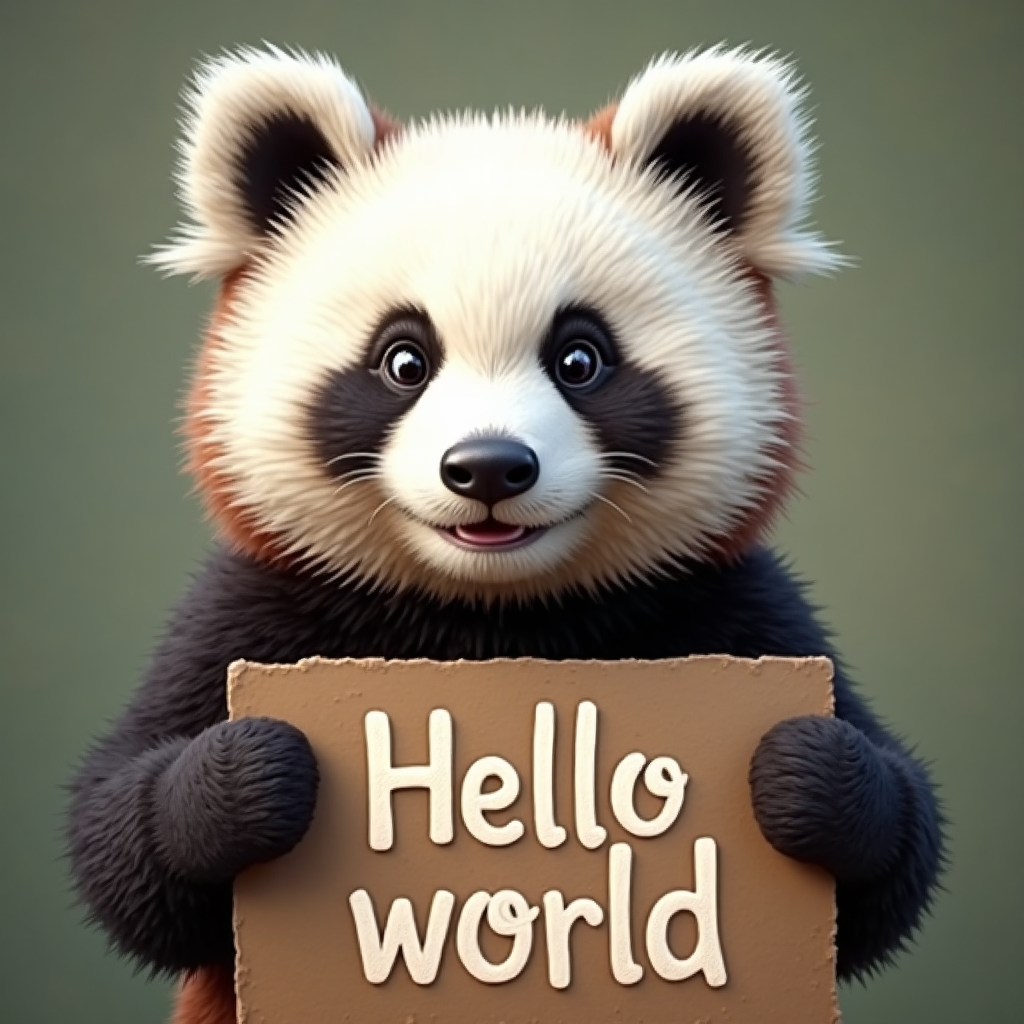

In [8]:
image

In [9]:
print("Residual diff threshold:", transformer.get_residual_diff_threshold())

Residual diff threshold: 0.06


In [10]:
transformer.set_residual_diff_threshold(0.1)

In [11]:
with FBTransformerCacheContext() as fb_ctx:
    image = pipeline(prompt, num_inference_steps=num_inference_steps, guidance_scale=3.5).images[0]

100%|██████████| 50/50 [00:07<00:00,  6.27it/s]


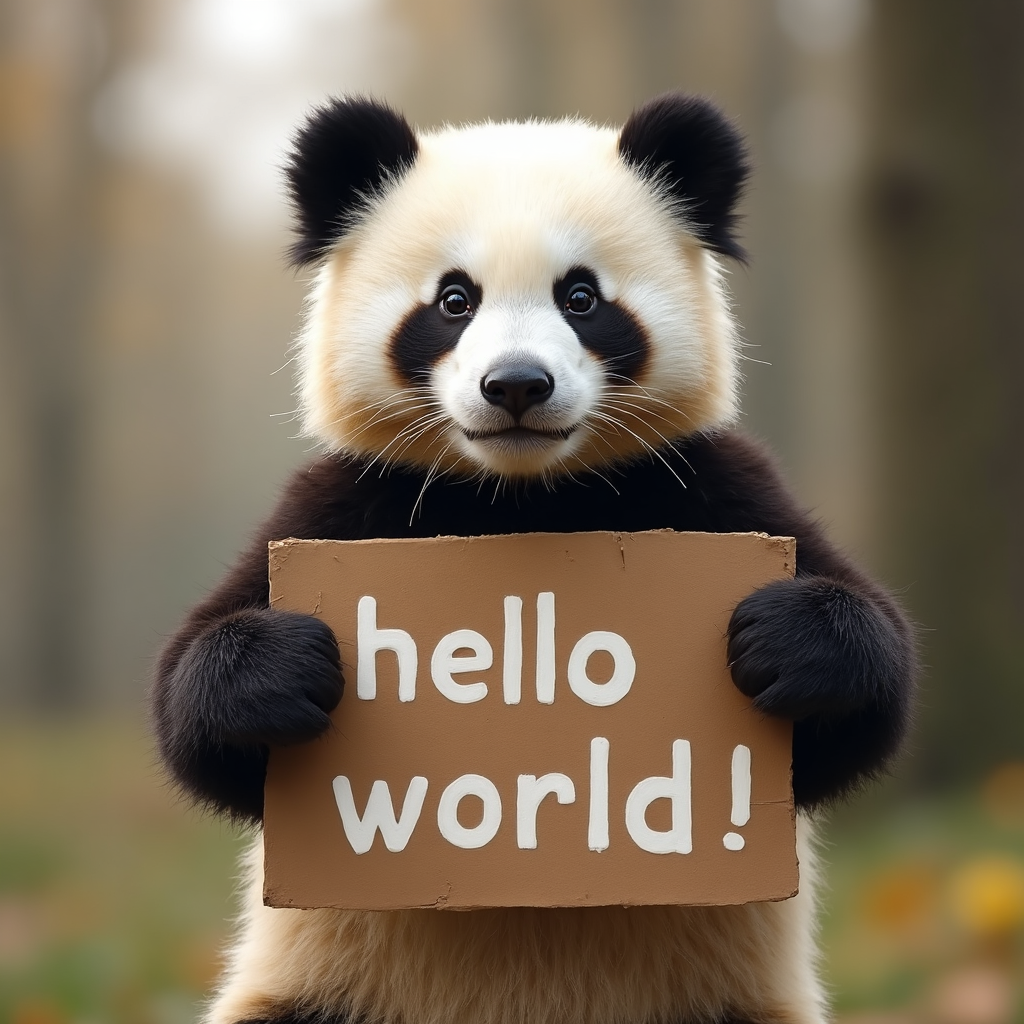

In [12]:
image